# Загрузка и обработка данных.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('train.csv',index_col = 0,header = 0)

train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
def data_pro(data):
    # отбрасываю явно ненужные для модели значения и заменяю пропущеные данные.
    data.drop(['Name','Ticket','Cabin','Embarked'], axis = 1, inplace = True)
    data.Age.fillna(data.Age.mean())

data_pro(train)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


# Анализ данных
## Визуализация

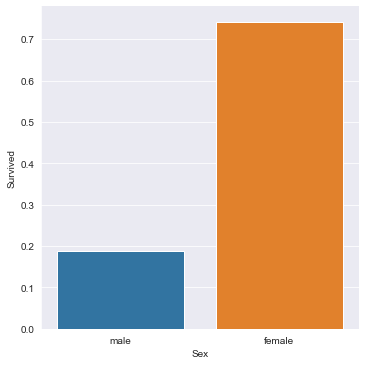

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

sns.catplot(data=train, kind="bar",x="Sex", y="Survived",ci = None)

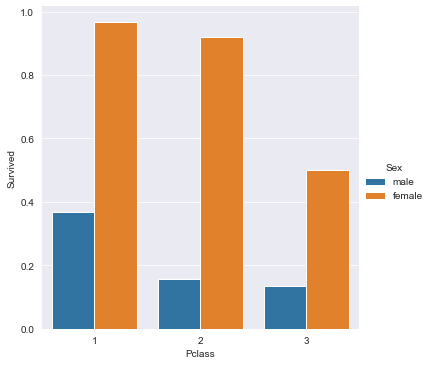

In [6]:
sns.catplot(data=train, kind="bar",x="Pclass", y="Survived", hue="Sex",ci = None)

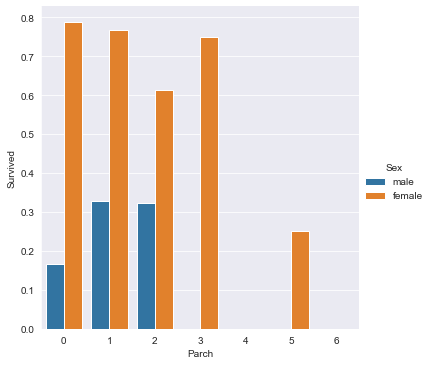

In [7]:
sns.catplot(data=train, kind='bar',x='Parch',y='Survived',hue='Sex',ci = None)

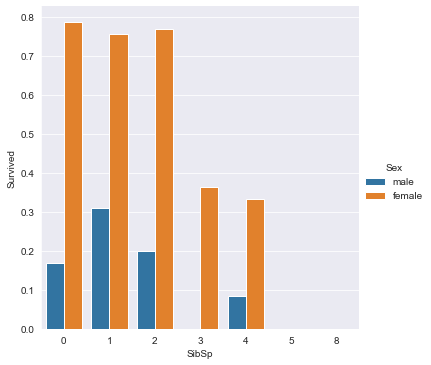

In [8]:
sns.catplot(data=train,kind='bar',x='SibSp',y='Survived',hue='Sex',ci = None)

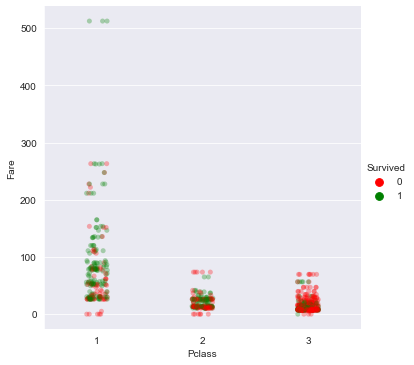

In [9]:
sns.catplot(data=train,kind='strip',x='Pclass',y='Fare',hue='Survived',palette = ['red','green'], alpha = 0.3)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

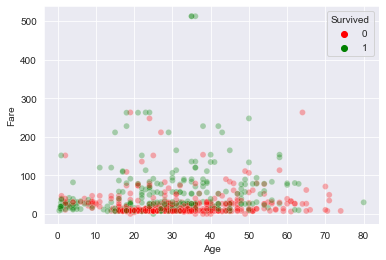

In [10]:
sns.scatterplot(data = train,x = 'Age', y = 'Fare', hue = 'Survived', palette = ['red', 'green'], alpha = 0.3)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

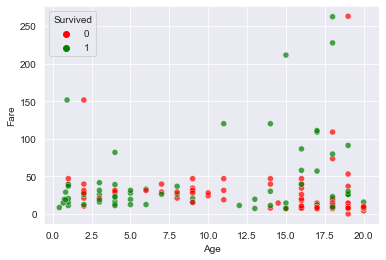

In [23]:
sns.scatterplot(data = train[train.Age <=20],x = 'Age', y = 'Fare', hue = 'Survived', palette = ['red', 'green'], alpha = 0.7)

## Выводы:
Женщины явно имеют большую выживаемость нежели мужчины, так же хорошими  критериями являются плата за билет и его класс.  
Среди детей много выживших, но после 15 лет возраст не оказывает большого влияния  
Большое количество спутников на борту приводит к меньшей выживаемости, но мужчины с 1-2 родственниками/супругой имеют больше шансов  
# Выбор модели
## Подготовка данных к обучению

In [12]:
 def data_fe(data):
    data_ohe = pd.get_dummies(data,columns = ['Pclass','Sex','Parch','SibSp'])
    data_ohe = data_ohe.drop(['Sex_male','Age'],axis = 1)
    data_ohe = data_ohe.assign(Child = 1)    
    data_ohe.Child.where(data.Age <= 15,other = 0,inplace = True)
    data_ohe.Child.mask(data.Age <= 15,other = 1,inplace = True)
    return data_ohe


train_fe = data_fe(train)
X = train_fe.drop('Survived',axis = 1).values
y = train_fe['Survived'].values

## Кросс валидация

In [13]:
from sklearn.model_selection import cross_validate

### Логистическая регрессия

In [14]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'newton-cg')
logreg_score = cross_validate(logreg,X,y)['test_score']

logreg_score.mean()

0.7990898248697508

### Опорновекторная машина

In [15]:
from sklearn.svm import SVC
svc = SVC()
svc_score = cross_validate(svc,X,y)['test_score']

svc_score.mean()

0.6678865105768628

### К ближайших соседей

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc_score = cross_validate(knc,X,y)['test_score']

knc_score.mean()

0.7654886698888959

### Случайные леса

In [17]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()
rfc_score = cross_validate(rfc,X,y,cv=3)['test_score']

rfc_score.mean()

0.8069584736251403

## Выводы:  
Случайные леса и логистическая регрессия показывают наилучший результат, обучу их на всем наборе.
# Построение итоговых моделей
## Импорт тестовых данных

In [18]:
test = pd.read_csv('test.csv',index_col = 0,header = 0)
data_pro(test)

test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    object 
 2   Age     332 non-null    float64
 3   SibSp   418 non-null    int64  
 4   Parch   418 non-null    int64  
 5   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 22.9+ KB


In [19]:
test.Fare.fillna(test.Fare.mean(), inplace = True)
test_fe = data_fe(test)
test_fe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fare        418 non-null    float64
 1   Pclass_1    418 non-null    uint8  
 2   Pclass_2    418 non-null    uint8  
 3   Pclass_3    418 non-null    uint8  
 4   Sex_female  418 non-null    uint8  
 5   Parch_0     418 non-null    uint8  
 6   Parch_1     418 non-null    uint8  
 7   Parch_2     418 non-null    uint8  
 8   Parch_3     418 non-null    uint8  
 9   Parch_4     418 non-null    uint8  
 10  Parch_5     418 non-null    uint8  
 11  Parch_6     418 non-null    uint8  
 12  Parch_9     418 non-null    uint8  
 13  SibSp_0     418 non-null    uint8  
 14  SibSp_1     418 non-null    uint8  
 15  SibSp_2     418 non-null    uint8  
 16  SibSp_3     418 non-null    uint8  
 17  SibSp_4     418 non-null    uint8  
 18  SibSp_5     418 non-null    uint8  
 19  SibSp_8     418 non-null  

In [20]:
test_fe.Parch_6 += test_fe.Parch_9
test_fe.drop('Parch_9',axis = 1,inplace = True)

## Создание файлов
### Случайный лес

In [21]:
rfc.fit(X,y)
rfc_pred = pd.Series(rfc.predict(test_fe),index = test.index, name = 'Survived')
rfc_pred.to_csv('rfc_pred.csv')

### Логистическая регрессия 

In [22]:
logreg.fit(X,y)
logreg_pred = pd.Series(logreg.predict(test_fe),index = test.index, name = 'Survived')
logreg_pred.to_csv('logreg_pred.csv')

# Итог  

Точность логистической регрессии - 0.77272  
Точность случайного леса - 0.75837  
